# Introduction of transformers
* https://www.youtube.com/watch?v=mn6r5PYJcu0&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi&index=28
* https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_4_intro_transformers.ipynb


Transformers are neural networks that provide state-of-the-art solutions for many of the problems previously assigned to recurrent neural networks. Sequences can form both the input and the output of a neural network, examples of such configurations include:
* Vector to Sequence - Image captioning
* Sequence to Vector - Sentiment analysis
* Sequence to Sequence - Language translation


Sequence-to-sequence allows an input sequnece to produce an output sequence based on an input sequence. Transformers focus primarily on this sequence-to-sequence configuration.

# High-Level Overview of Transformers
This cours focus primarily on the application of deep neural networks. The focus will be on presenting data to a transformer and a transfomer's major components. As a result, we will not focus on implementing a transformer at the lowest level. The following section provides an overview of criticcal internal parts of a transformer, such as residual connections and attention. In the next chapter, we will use transformers from Hugging Face to perform natural language processing with transformers.

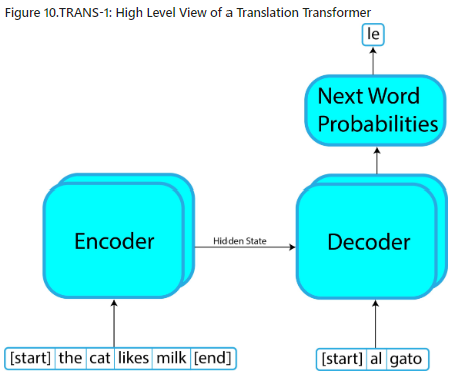

In [1]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/study_DeepLearning/pytorch_youtube/images/transformer_1.png')
im

We use a transformer that translates between English and Spanish for this example. We present the English sentence "the cat likes milk" and receive a Spanish translation of "al gato le gusta la leche".


We begin by placing the English source sentence between the biginning and ending tokens. This input can be of any length, and we presented it to the neural network as a ragged(断片) Tensor. Because the Tensor is ragged, nopadding is necessary. Such input is acceptable for the attention layer that will receive the source sentence. The encoder transforms this ragged input into a hidden state containing a series of key-value pairs representing the knowledge in the source sentences. The encoder understands to read English and convert to a hidden state. The decoder understands how to output Spanish from this hidden state.


We initially present the decoder with the hidden state and the starting token. The decoder will predict the probabilities of all words in its vocabulary. The word with the highest probability is the first word of the sentence.


The highest probability word is attached concatenated to the translated sentence, initially containing only the beginning token. This process cotinues, growing the translated sentence in each iteration until the decoder predicts the ending token.

# Transformer Hyperparameters
Before we describe how these layers fit together, we must consider the following transformer hyperparameters, along with default settings from the Keras transformer example:
* **num_layers = 4**
* **d_model = 128**
* **dff = 512**
* **num_heads = 8**
* **dropout_rate = 0.1**

Multiple encoder and decoder layers can be present. The **num_layers** hyperparameter specifies how many encoder and decoder layers there are. The expected tensor shape for the input to the encoder layer is the same as the output produced; as a result, you can easily stack these layers.


We will see embedding layers in the next chapter. However, you can think of an embedding layer as a dictonary for now. Each entry in the embedding corresponds to each word in a fixed-size vocabulary. Similar words should have similar vectors. The **d_model** hyperparameter specifies the size of the embedding vector. Though you will sometimes preload embeddings from a project such as Word2vec or GloVe, the optimizer can train these embeddings with the rest of the transformer. Training your embedings allows the **d_model** hyperparameter to set to any desired value. If you transfer the embeddings, you must set the **d_model** hyperparameter to the same value as the transferred embeddings.


The **dff** hyperparameter specifies the size of the dense feedforward layers. The **num_heads** hyperparameter sets the number of attention layers heads. Finally, the **dropout_rate** specifies a dropout percentage to combat overfitting.

# Inside a Transformer
In this section, we will examine the internals of a transformer so that you become familiar with essential concept such as:
* **Embedding**
* **Positional Encoding**
* **Attention and Self-Attention**
* **Residual Connection**

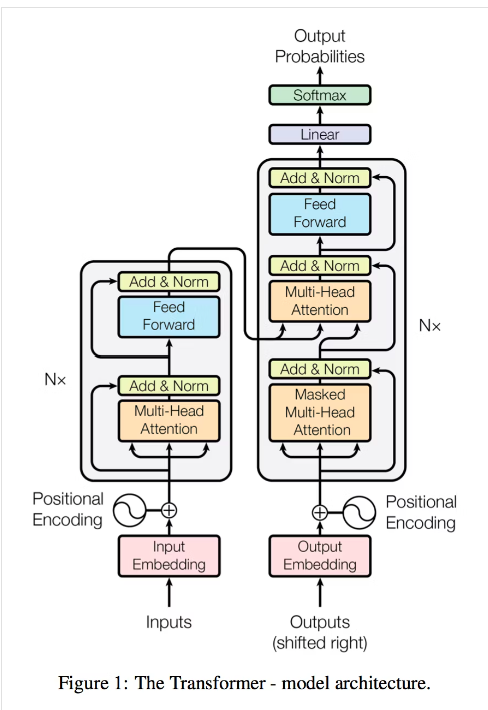

In [2]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/study_DeepLearning/pytorch_youtube/images/transformer_2.png')
im

While the original transformer paper is titled "Attention is All you Need", attention isn't the only type you need. The transformer also contains dense layers. However, the tilte "Attention and Dense Layers are All You Need" isn't as chatcy.


The transformer begins by tokenizing the input English sentence. Tokens may or may not be words. Generally, familiar parts of words are tokenized and become building blocks of longer words. This tokenization allows common suffixes and prefixes to be understood independently of their stem(幹) word. Each token becomes a numeric index that the transformer uses to look up the vector. There are several special tokens:
* Index 0 = Pad
* Index 1 = Unknow
* Index 2 = Start token
* Index 3 = End token

The transformer uses index 0 when we must pad unused space at the end of a tensor. Index 1 is for unknown words. The starting and ending tokens are provided by indexes 2 and 3.


The token vectors are simply the inputs to the attention layers; there is no implied order or position. The transformer adds the slopes of a sine and cosine wave to the token vectors to encode position.


Attention layers have three inputs: key(k), value(v), and query(q). This layer is self-attention if the query, key, and value are the same. The key and value pairs specify the information that the query operates upon. The attention layer learns what positions of data to focus upon.


The transformer presents the position encoded embedding vectors to the first self-attention segment in the encoder layer. The output from the attention is normalized and ultimately becomes the hidden state after all encoder layers are processed.


The hidden state is only calculated once per query. Once the input Spanish sentence becomes a hidden state, this value is presented repeatedly to the decoder until the decoder forms the final Spanish sentence.
